In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the kpis and Tilt DataFrames and clean

- Load the 2 DataFrames with KPIs and Tilt data.
- start cleaning the data
    - looking for duplicates 
    - null val
    - removing unnecessary columns

In [593]:
#load the 2 dataframes, df is the KPIs and df1 is the Tilts configs
df_kpis = pd.read_excel('LTE_Layer Comparisons_20230627.xlsx')
df_tilts = pd.read_excel('Copy of SGS_RET_inconsistencies_with_planning_data_23_6_2023.xlsx')

In [594]:
df_kpis.shape

(1877, 20)

In [595]:
#Columns in df KPis
df_kpis.columns

Index(['ENODEB_ID', 'CI', 'CellName', 'Freq', 'BW', 'CellOwner',
       'VF KPI 160 Cell Util (PRB)', 'Total DL Traffic Mbytes',
       'Avg DL Cell Throughput Mbps ', 'Max Connected Users',
       'Avg TA Distance Km', 'Cell Unavail Rate', 'Avg CQI',
       'Avg SINR PUCCH dB', 'Avg SINR PUSCH dB', 'CA DL Traffic MB',
       'CA UL Traffic MB', 'Avg DL CA User Throughput',
       'Avg UL CA User Throughput', 'Avg DL Non-CA User Throughpu'],
      dtype='object')

In [323]:
#rename the df1 columns to match the df
df_tilts.rename(columns = {'ENodeBId':'ENODEB_ID', 'LOCALCELL_ID':'CI'}, inplace = True)

In [324]:
#list the columns in df1 (tilts data)
df_tilts.columns

Index(['REGION', 'COUNTRY', 'ENODEB', 'ENODEB_ID', 'CI', 'Urgency',
       'Elec Tilt Warning', 'SiteID', 'TX_ID', 'Tilt', 'Planning Elec Tilt',
       'CTRLCN', 'CTRLSN', 'CTRLSRN', 'RETTYPE', 'SCENARIO', 'SERIALNO',
       'DEVICENAME', 'SUBNAME', 'SUBUNITNO'],
      dtype='object')

In [507]:
#print duplicates of the 2 dataframes
print('df_kpis duplicates: ' + df_kpis.duplicated().sum().astype(str))
print('df_tilts df duplicates: ' + df_tilts.duplicated().sum().astype(str))

df_kpis duplicates: 0
df_tilts df duplicates: 0


In [326]:
#Create a feature that checks if the Cells is a Vodacom or RAIN cell
df_tilts['RAIN'] = df_tilts['DEVICENAME'].str.contains('WBS', case=False)

In [329]:
df_tilts.head()

,REGION,COUNTRY,ENODEB,ENODEB_ID,CI,Urgency,Elec Tilt Warning,SiteID,TX_ID,Tilt,...,CTRLCN,CTRLSN,CTRLSRN,RETTYPE,SCENARIO,SERIALNO,DEVICENAME,SUBNAME,SUBUNITNO,RAIN
0,SGS,ZA,LTE_Brakpan_GSMT01_SGS,211041,1,Warning,Elec Tilt: Plan (4) vs RET (2),SGS_11041,SGS_E3_11041_1,2.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,E4L2444674-Y4,Sector 1 - WBS2600/WBS1800,NaN,1,True
1,SGS,ZA,LTE_City_Deep_West_GSMT01_SGS,235181,1,Critical,Elec Tilt: Plan (7) vs RET (2),SGS_35181,SGS_E3_35181_1,2.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,E4K4335814-Y4,Sector 1 - WBS2600/WBS1800,NaN,1,True
2,SGS,ZA,LTE_Empire_GSMT01_SGS,213651,1,Warning,Elec Tilt: Plan (5) vs RET (2.5),SGS_13651,SGS_E3_13651_1,2.5,...,0,0,80,SINGLE_RET,DAISY_CHAIN,CSJ0615898-Y4,Sector 1 - WBS2600/WBS1800,NaN,1,True
3,SGS,ZA,LTE_Khandubuhle_GSMT01_SGS,212361,1,Warning,Elec Tilt: Plan (7) vs RET (5),SGS_12361,SGS_E3_12361_1,5.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,E4K5081283-Y3,Sector 1 - VDC1800/VDC2100 - 2,NaN,1,False
4,SGS,ZA,LTE_Kitchener_Ave_GSMT01_SGS,234101,1,Critical,Elec Tilt: Plan (5) vs RET (14),SGS_34101,SGS_E3_34101_1,14.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,E4K4867214-Y4,Sector 1 - WBS2600/WBS1800,NaN,1,True


In [330]:
df_tilts_VOD = df_tilts.query('RAIN == False')

In [331]:
df_tilts_VOD.query('CI == 100')

,REGION,COUNTRY,ENODEB,ENODEB_ID,CI,Urgency,Elec Tilt Warning,SiteID,TX_ID,Tilt,...,CTRLCN,CTRLSN,CTRLSRN,RETTYPE,SCENARIO,SERIALNO,DEVICENAME,SUBNAME,SUBUNITNO,RAIN
1882,SGS,ZA,LTE_Braamfischerville_GSMT01_SGS,238441,100,Warning,Elec Tilt: Plan (6) vs RET (5),SGS_38441,SGS_R3_38441_1,5.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,M3249K704PD93LTy2,Sector 1 - VDC1800/VDC2100 - 1,NaN,1,False
1886,SGS,ZA,LTE_Apex_Primary_GSMT01_SGS,250601,100,Critical,Elec Tilt: Plan (6) vs RET (12),SGS_50601,SGS_R3_50601_1,12.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,M3249K701Y905RTy4,Sector 1 - VDC1800/VDC2100 - 2,NaN,1,False
1888,SGS,ZA,LTE_Karee_LP_GSMT01_SGS,243201,100,Urgent,Elec Tilt: Plan (7) vs RET (10),SGS_43201,SGS_R3_43201_1,10.0,...,1,0,4,SINGLE_RET,DAISY_CHAIN,0000CN10160203908,SEC1_1800,NaN,1,False
1889,SGS,ZA,LTE_Meyersdal_LP2_GSMT01_SGS,248821,100,Urgent,Elec Tilt: Plan (6) vs RET (10),SGS_48821,SGS_R3_48821_1,10.0,...,1,0,4,SINGLE_RET,DAISY_CHAIN,CSH3896747-Y2,1800M_SEC_1,NaN,1,False
1891,SGS,ZA,LTE_Vanderbijlpark_GSMT01_SGS,211661,100,Urgent,Elec Tilt: Plan (5) vs RET (9),SGS_11661,SGS_R3_11661_1,9.0,...,0,0,70,SINGLE_RET,DAISY_CHAIN,M3249M6007T29RTy4,Sector 1 - VDC1800/VDC2100 - 2,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,SGS,ZA,LTE_Lesiba_School_GSMT01_SGS,215321,100,Warning,Elec Tilt: Plan (6) vs RET (5),SGS_15321,SGS_R3_15321_1,5.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,M3249K800P119LTy2,Sector 1 - VDC1800/VDC2100 - 1,NaN,1,False
2746,SGS,ZA,LTE_Tsoaranang_Primary_GSMT01_SGS,237301,100,Critical,Elec Tilt: Plan (3) vs RET (10),SGS_37301,SGS_R3_37301_1,10.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,M3249L503RG63LTy2,Sector 1 - VDC1800/VDC2100 - 1,NaN,1,False
2747,SGS,ZA,LTE_Victoria_Str_LP_GSMT01_SGS,235481,100,Warning,Elec Tilt: Plan (6) vs RET (4),SGS_35481,SGS_R3_35481_1,4.0,...,0,0,4,SINGLE_RET,DAISY_CHAIN,0000CN10151662856,Sector 3 - 1800,NaN,1,False
2750,SGS,ZA,LTE_St_Columb_Rd_GSMT01_SGS,214421,100,Warning,Elec Tilt: Plan (6) vs RET (7),SGS_14421,SGS_R3_14421_1,7.0,...,0,0,80,SINGLE_RET,DAISY_CHAIN,M3249K800NC49RTy4,Sector 1 - VDC1800/VDC2100 - 2,NaN,1,False


In [332]:
#delete the columns not needed
df_tilts_VOD.drop(columns = ['REGION', 'COUNTRY', 'ENODEB', 'Urgency',
       'Elec Tilt Warning', 'SiteID', 'TX_ID', 'Planning Elec Tilt',
       'CTRLCN', 'CTRLSN', 'CTRLSRN', 'RETTYPE', 'SCENARIO', 'SERIALNO',
       'DEVICENAME', 'SUBNAME', 'SUBUNITNO'],inplace=True)

C:\Users\kaudim\AppData\Local\Temp\ipykernel_17472\910619112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tilts_VOD.drop(columns = ['REGION', 'COUNTRY', 'ENODEB', 'Urgency',


In [333]:
df_tilts_VOD.head()

,ENODEB_ID,CI,Tilt,RAIN
3,212361,1,5.0,False
5,226171,1,9.0,False
7,222361,1,9.0,False
11,218151,1,8.0,False
15,222521,1,9.0,False


In [334]:
df_tilts_VOD.CI.unique()

array([  1,  10, 100, 101, 102,  11,  12,   2,  20,  21,  22,   3,  30,
        31,  32,   4,  40,  41,  42,  50,  51,  52], dtype=int64)

In [336]:
df_tilts_VOD.head()

,ENODEB_ID,CI,Tilt,RAIN
3,212361,1,5.0,False
5,226171,1,9.0,False
7,222361,1,9.0,False
11,218151,1,8.0,False
15,222521,1,9.0,False


# Merge the 2 DataFrames on ENODEB_ID and CI

- Format the column headings by replacing spacings and brackets with underscores
- Add a new feature, Sector which identifies the Sector of the cell
- Move the column to next ot the CI
- Look for and remove duplicates

In [596]:
#merge the tilts into the main dataframe, df
#df_merged_tilts=df_kpis.merge(df_tilts_VOD, on=['ENODEB_ID', 'CI'], how='left')
df_merged_tilts=df_kpis

In [597]:
df_merged_tilts.columns = df_merged_tilts.columns.str.replace(' ', '_') #remove spaces on the column name and replace with underscore
df_merged_tilts.columns = df_merged_tilts.columns.str.replace('(', '_')#replace open bracket with underscore
df_merged_tilts.columns = df_merged_tilts.columns.str.replace(')', '') #remove close brackets

In [598]:
#Create the sector column to indicate the sector of the cell
df_merged_tilts['Sector'] = df_merged_tilts['CI'].astype(str).str[:1]

In [599]:
#move the Sector column next to before the CI
Sector=df_merged_tilts.pop('Sector')
df_merged_tilts.insert(1,"Sector",Sector)

In [600]:
df_merged_tilts.shape

(1877, 21)

In [601]:
df_merged_tilts.duplicated().sum()

0

In [602]:
df_merged_tilts.drop_duplicates(inplace=True)

In [603]:
df_merged_tilts.duplicated().sum()

0

In [604]:
df_merged_tilts.shape

(1877, 21)

In [605]:
df_merged_tilts.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
0,27771,3,32,LTE_Dawn_Park_North_SGS_32,L9,10MHz,VOD,38.444,2562.88,7.68,...,1.00,1.716,7.4192,-2.44,0.00,2053.40,0.00,12.28,0.840000,2.08
1,27771,3,31,LTE_Dawn_Park_North_SGS_31,L21,15MHz,VOD,97.564,88805.24,18.52,...,1.60,1.716,11.2664,3.16,5.04,65679.52,73.84,12.84,1.640000,6.80
2,27771,3,3,LTE_Dawn_Park_North_SGS_3,L18,10MHz,VOD,53.636,19616.04,13.64,...,1.00,1.716,10.9924,2.44,9.32,15231.12,0.16,17.32,1.680000,7.60
3,27771,2,22,LTE_Dawn_Park_North_SGS_22,L9,10MHz,VOD,50.028,13808.44,12.32,...,0.80,1.720,10.0228,-0.08,8.60,13056.08,0.00,13.80,2.041667,2.72
4,27771,2,21,LTE_Dawn_Park_North_SGS_21,L21,15MHz,VOD,103.412,121241.64,22.24,...,2.16,1.716,9.9544,3.64,5.32,72605.08,22.92,14.32,1.280000,7.92


In [606]:
df_merged_tilts.tail()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
1872,210431,2,21,LTE_Spruitview_SGS_21,L21,10MHz,VOD,63.376923,37530.423077,16.038462,...,1.000000,4.196154,11.207308,4.115385,8.153846,9396.384615,8.500000,21.615385,1.576923,14.192308
1873,210431,2,2,LTE_Spruitview_SGS_2,L18,10MHz,VOD,73.457692,41624.153846,13.307692,...,1.000000,4.196154,11.990769,1.692308,4.423077,15158.961538,24.730769,16.730769,2.038462,9.538462
1874,210431,1,12,LTE_Spruitview_SGS_12,L9,5MHz,VOD,104.738462,35526.961538,14.576923,...,1.000000,4.196154,11.414231,3.076923,11.269231,31709.346154,1.000000,14.500000,1.192308,5.807692
1875,210431,1,11,LTE_Spruitview_SGS_11,L21,10MHz,VOD,94.500000,48256.538462,13.730769,...,1.076923,4.196154,10.711538,1.500000,3.307692,14031.769231,18.653846,13.615385,1.692308,8.423077
1876,210431,1,1,LTE_Spruitview_SGS_1,L18,10MHz,VOD,98.800000,52729.769231,13.115385,...,1.038462,4.196154,12.315769,2.230769,4.692308,22636.192308,27.769231,11.730769,2.000000,7.000000


In [607]:
df_merged_tilts.isna().sum()

ENODEB_ID                       0
Sector                          0
CI                              0
CellName                        0
Freq                            0
BW                              0
CellOwner                       0
VF_KPI_160_Cell_Util__PRB       0
Total_DL_Traffic_Mbytes         0
Avg_DL_Cell_Throughput_Mbps_    0
Max_Connected_Users             0
Avg_TA_Distance_Km              0
Cell_Unavail_Rate               0
Avg_CQI                         0
Avg_SINR_PUCCH_dB               0
Avg_SINR_PUSCH_dB               0
CA_DL_Traffic_MB                0
CA_UL_Traffic_MB                0
Avg_DL_CA_User_Throughput       0
Avg_UL_CA_User_Throughput       0
Avg_DL_Non-CA_User_Throughpu    0
dtype: int64

In [608]:
df_merged_tilts.shape

(1877, 21)

In [609]:
df.CellOwner.unique()

array(['VOD', 'RAIN'], dtype=object)

# Insights Investigations

- Look into the numbers between Vodacom and RAIN cells
- Look for the relationship between the different Freq layers in terms of
    - Load (KPI160)
    - User (Max_Connected_Users)

<Axes: xlabel='Freq', ylabel='Count'>

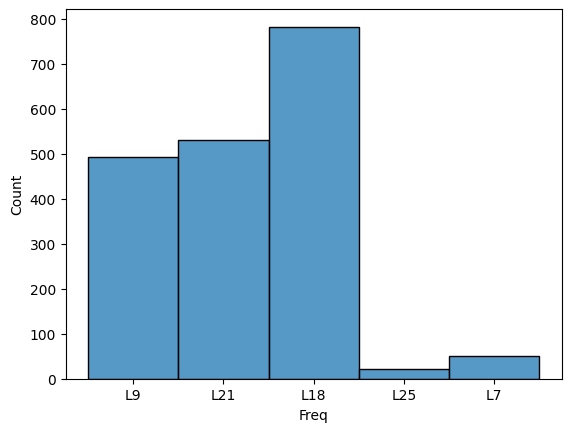

In [522]:
#Amount of cells per frequency(both Vodacom and RAIN)
sns.histplot(data=df_kpis, x='Freq') 

In [523]:
plt.close()

In [524]:
print('Number of L1800 on df_kpis: ' + df_kpis.query("Freq=='L18'").value_counts().sum().astype(str))
print('Number of L1800 on df_merged_tilts(Vodacom only): ' + df_merged_tilts.query("Freq=='L18'").value_counts().sum().astype(str))

Number of L1800 on df_kpis: 782
Number of L1800 on df_merged_tilts(Vodacom only): 782


<Axes: xlabel='Freq', ylabel='Count'>

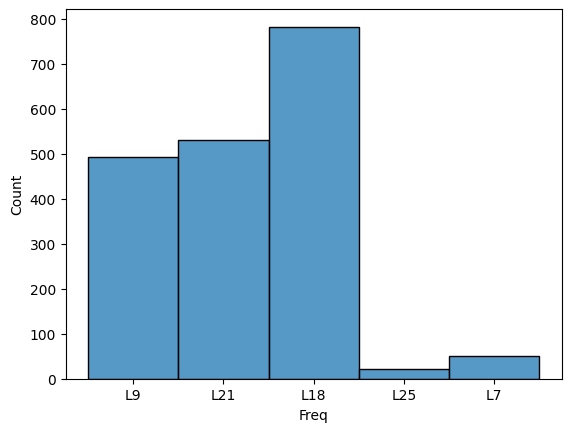

In [525]:
#amount of cells per frequency - Vodacom only
sns.histplot(data=df_merged_tilts, x='Freq') 

In [526]:
plt.close()

In [610]:
df_merged_tilts.columns #list the columns

Index(['ENODEB_ID', 'Sector', 'CI', 'CellName', 'Freq', 'BW', 'CellOwner',
       'VF_KPI_160_Cell_Util__PRB', 'Total_DL_Traffic_Mbytes',
       'Avg_DL_Cell_Throughput_Mbps_', 'Max_Connected_Users',
       'Avg_TA_Distance_Km', 'Cell_Unavail_Rate', 'Avg_CQI',
       'Avg_SINR_PUCCH_dB', 'Avg_SINR_PUSCH_dB', 'CA_DL_Traffic_MB',
       'CA_UL_Traffic_MB', 'Avg_DL_CA_User_Throughput',
       'Avg_UL_CA_User_Throughput', 'Avg_DL_Non-CA_User_Throughpu'],
      dtype='object')

In [528]:
df_merged_tilts.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
0,27771,3,32,LTE_Dawn_Park_North_SGS_32,L9,10MHz,VOD,38.444,2562.88,7.68,...,1.00,1.716,7.4192,-2.44,0.00,2053.40,0.00,12.28,0.840000,2.08
1,27771,3,31,LTE_Dawn_Park_North_SGS_31,L21,15MHz,VOD,97.564,88805.24,18.52,...,1.60,1.716,11.2664,3.16,5.04,65679.52,73.84,12.84,1.640000,6.80
2,27771,3,3,LTE_Dawn_Park_North_SGS_3,L18,10MHz,VOD,53.636,19616.04,13.64,...,1.00,1.716,10.9924,2.44,9.32,15231.12,0.16,17.32,1.680000,7.60
3,27771,2,22,LTE_Dawn_Park_North_SGS_22,L9,10MHz,VOD,50.028,13808.44,12.32,...,0.80,1.720,10.0228,-0.08,8.60,13056.08,0.00,13.80,2.041667,2.72
4,27771,2,21,LTE_Dawn_Park_North_SGS_21,L21,15MHz,VOD,103.412,121241.64,22.24,...,2.16,1.716,9.9544,3.64,5.32,72605.08,22.92,14.32,1.280000,7.92


<Axes: xlabel='CellOwner,Freq'>

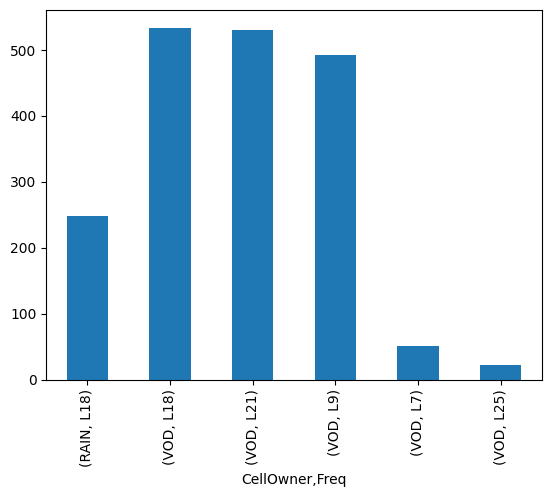

In [611]:
df_merged_tilts.groupby('CellOwner')['Freq'].value_counts().plot(kind='bar')

In [612]:
df_merged_tilts.dtypes

ENODEB_ID                         int64
Sector                           object
CI                                int64
CellName                         object
Freq                             object
BW                               object
CellOwner                        object
VF_KPI_160_Cell_Util__PRB       float64
Total_DL_Traffic_Mbytes         float64
Avg_DL_Cell_Throughput_Mbps_    float64
Max_Connected_Users             float64
Avg_TA_Distance_Km              float64
Cell_Unavail_Rate               float64
Avg_CQI                         float64
Avg_SINR_PUCCH_dB               float64
Avg_SINR_PUSCH_dB               float64
CA_DL_Traffic_MB                float64
CA_UL_Traffic_MB                float64
Avg_DL_CA_User_Throughput       float64
Avg_UL_CA_User_Throughput       float64
Avg_DL_Non-CA_User_Throughpu    float64
dtype: object

<Axes: xlabel='Freq'>

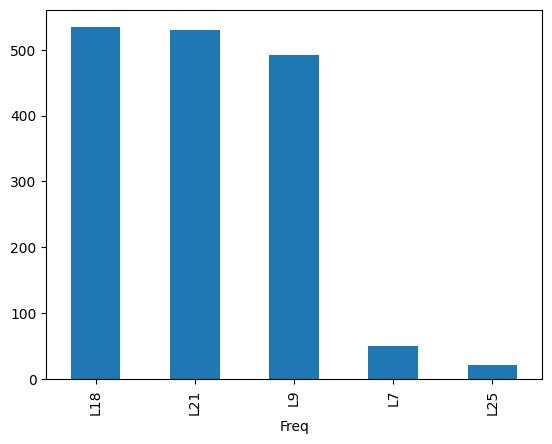

In [613]:
#number of cells for the frequency in Vodacom
df_merged_tilts.query("CellOwner == 'VOD'")['Freq'].value_counts().plot(kind='bar') 

In [532]:
df_merged_tilts.columns

Index(['ENODEB_ID', 'Sector', 'CI', 'CellName', 'Freq', 'BW', 'CellOwner',
       'VF_KPI_160_Cell_Util__PRB', 'Total_DL_Traffic_Mbytes',
       'Avg_DL_Cell_Throughput_Mbps_', 'Max_Connected_Users',
       'Avg_TA_Distance_Km', 'Cell_Unavail_Rate', 'Avg_CQI',
       'Avg_SINR_PUCCH_dB', 'Avg_SINR_PUSCH_dB', 'CA_DL_Traffic_MB',
       'CA_UL_Traffic_MB', 'Avg_DL_CA_User_Throughput',
       'Avg_UL_CA_User_Throughput', 'Avg_DL_Non-CA_User_Throughpu'],
      dtype='object')

In [614]:
#Create the DataFrames for the different frequencies

df_900 = df_merged_tilts.query("Freq=='L9'")
df_1800 = df_merged_tilts.query("Freq=='L18'")
df_2100 = df_merged_tilts.query("Freq=='L21'")
df_700 = df_merged_tilts.query("Freq=='L7'")
df_2600 = df_merged_tilts.query("Freq=='L25'")

[Text(0.5, 1.0, 'KPI160 - 2600'), Text(0.5, 0, 'VF_KPI_160(PRB)')]

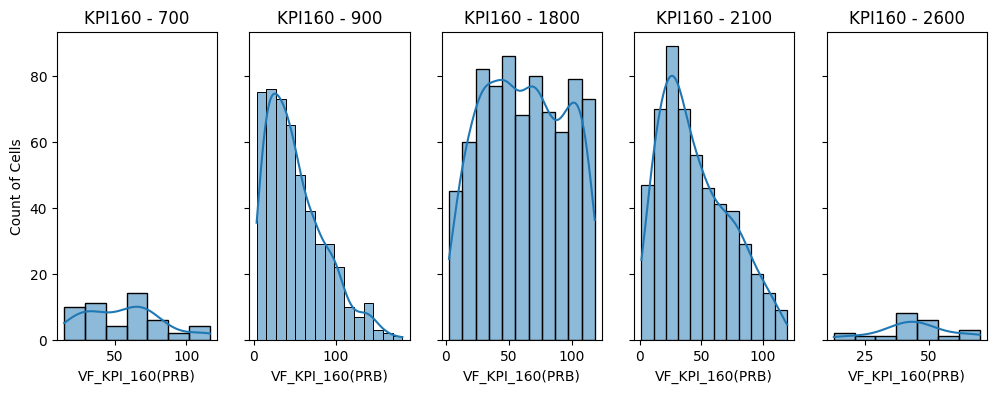

In [615]:
#Plot the KPI160 load across the different layers
#Insights show that 
#   - there is a high number of 900 cells that are not loaded
#  - 1800 is nicely spread out
#  - 2100 does not match 1800, need to investigate as propagation should be similar
#  - 700 and 2100 is low due to low number of sites


fig, axs = plt.subplots(1, 5, figsize=(12, 4), sharex='col', sharey='row')
g=sns.histplot(data=df_700, x='VF_KPI_160_Cell_Util__PRB', kde=True, ax=axs[0])
k=sns.histplot(data=df_900, x='VF_KPI_160_Cell_Util__PRB',kde=True, ax=axs[1])
h=sns.histplot(data=df_1800, x = 'VF_KPI_160_Cell_Util__PRB', kde=True, ax=axs[2])
j=sns.histplot(data=df_2100, x = 'VF_KPI_160_Cell_Util__PRB', kde=True, ax=axs[3])
i=sns.histplot(data=df_2600, x = 'VF_KPI_160_Cell_Util__PRB', kde=True, ax=axs[4])

g.set(title='KPI160 - 700', xlabel='VF_KPI_160(PRB)', ylabel='Count of Cells')
k.set(title='KPI160 - 900', xlabel='VF_KPI_160(PRB)')
h.set(title='KPI160 - 1800', xlabel='VF_KPI_160(PRB)')
j.set(title='KPI160 - 2100', xlabel='VF_KPI_160(PRB)')
i.set(title='KPI160 - 2600', xlabel='VF_KPI_160(PRB)')



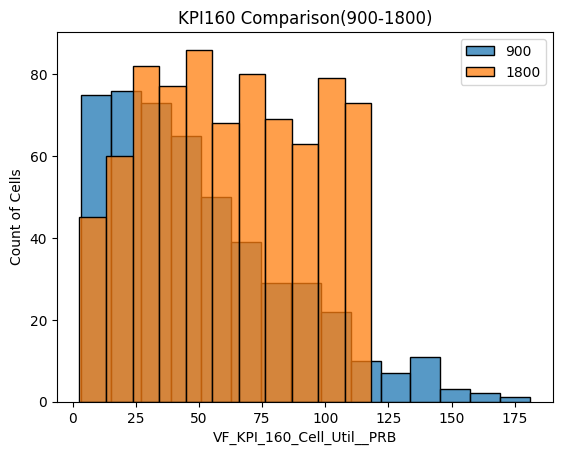

In [616]:
g=sns.histplot(data=df_900, x='VF_KPI_160_Cell_Util__PRB', label='900')
g=sns.histplot(data=df_1800, x='VF_KPI_160_Cell_Util__PRB', label='1800')
#g.set(xlim=(0, 8000))
g.set(title='KPI160 Comparison(900-1800)', xlabel='VF_KPI_160_Cell_Util__PRB', ylabel='Count of Cells')
plt.legend() 
plt.show()

[Text(0.5, 1.0, 'Users - 2600'), Text(0.5, 0, 'Max_Connected_Users')]

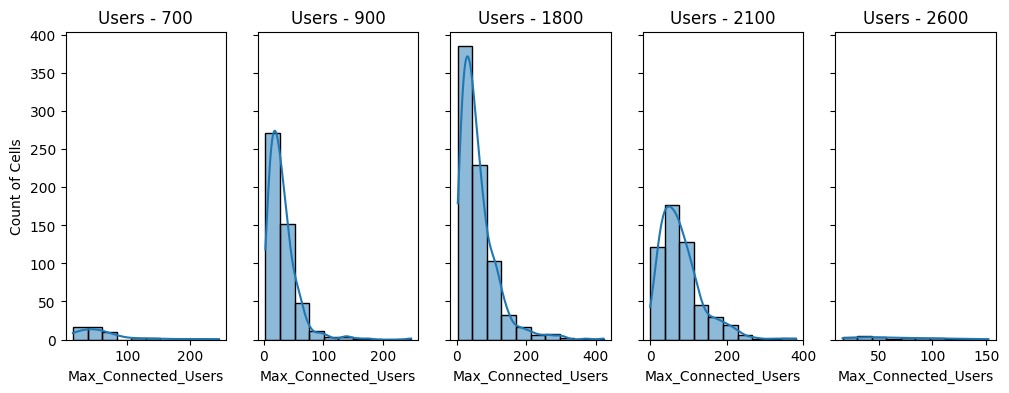

In [617]:
#Plot the Connected users across the different layers
#Insights show that 
#  - 1800 and 900 have a high number of cells with low number of users
#  - 2100 does not match 1800, need to investigate as propagation should be similar
#  - 700 and 2600 is low due to low number of sites

fig, axs = plt.subplots(1, 5, figsize=(12, 4),sharex='col', sharey='row')
g=sns.histplot(data=df_700, x='Max_Connected_Users', bins=10, kde=True, ax=axs[0])
k=sns.histplot(data=df_900, x='Max_Connected_Users',bins=10, kde=True, ax=axs[1])
h=sns.histplot(data=df_1800, x = 'Max_Connected_Users',bins=10, kde=True, ax=axs[2])
j=sns.histplot(data=df_2100, x = 'Max_Connected_Users',bins=10, kde=True, ax=axs[3])
i=sns.histplot(data=df_2600, x = 'Max_Connected_Users',bins=10, kde=True, ax=axs[4])

g.set(title='Users - 700', xlabel='Max_Connected_Users', ylabel='Count of Cells')
k.set(title='Users - 900', xlabel='Max_Connected_Users')
h.set(title='Users - 1800', xlabel='Max_Connected_Users')
j.set(title='Users - 2100', xlabel='Max_Connected_Users')
i.set(title='Users - 2600', xlabel='Max_Connected_Users')


# Analyze L18 vs L9 load imbalances

In [618]:
df_900.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
0,27771,3,32,LTE_Dawn_Park_North_SGS_32,L9,10MHz,VOD,38.444000,2562.880000,7.680000,...,1.000000,1.716000,7.419200,-2.440000,0.000000,2053.400000,0.000000,12.280000,0.840000,2.080000
3,27771,2,22,LTE_Dawn_Park_North_SGS_22,L9,10MHz,VOD,50.028000,13808.440000,12.320000,...,0.800000,1.720000,10.022800,-0.080000,8.600000,13056.080000,0.000000,13.800000,2.041667,2.720000
8,27771,1,12,LTE_Dawn_Park_North_SGS_12,L9,10MHz,VOD,90.372000,44460.360000,14.160000,...,1.000000,1.716000,9.600000,1.200000,9.440000,40830.560000,0.120000,13.200000,1.375000,2.680000
12,27761,3,32,LTE_Rondebult_Exch_SGS_32,L9,10MHz,VOD,32.730769,14168.730769,14.615385,...,0.961538,0.457692,9.096538,1.653846,8.115385,12867.769231,0.115385,28.115385,1.160000,4.307692
15,27761,2,22,LTE_Rondebult_Exch_SGS_22,L9,10MHz,VOD,24.123077,8470.000000,19.423077,...,0.384615,0.469231,8.280769,0.653846,8.807692,8194.730769,0.346154,26.560000,1.720000,4.000000


In [619]:
#Filtering the low 900 and high 1800 utilization cells 
df_low_load_900 = df_900.query("VF_KPI_160_Cell_Util__PRB < 30")
df_high_load_1800 = df_1800.query('VF_KPI_160_Cell_Util__PRB > 80')

In [620]:
df_low_load_900.shape

(165, 21)

In [621]:
df_high_load_1800.shape

(256, 21)

In [643]:
# need to join the 2 dataframes with high 18 and low 900 utilization
#includes Vodacom and RAIN cells
#includes L9 and L18
df_unbalanced_9_18 = pd.concat([df_low_load_900 , df_high_load_1800]) 

In [644]:
df_unbalanced_9_18.Freq.unique()

array(['L9', 'L18'], dtype=object)

In [623]:
#dataframe includes
df_unbalanced_9_18.shape

(421, 21)

In [624]:
df_unbalanced_9_18.head(10)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
15,27761,2,22,LTE_Rondebult_Exch_SGS_22,L9,10MHz,VOD,24.123077,8470.000000,19.423077,...,0.384615,0.469231,8.280769,0.653846,8.807692,8194.730769,0.346154,26.560000,1.720000,4.000000
30,259161,3,32,LTE_Enviroserve_Sundra_DAS_SGS_32,L9,10MHz,VOD,26.584615,1821.307692,6.615385,...,1.346154,1.096154,7.206923,1.923077,9.230769,0.000000,0.000000,0.000000,0.000000,6.423077
33,259161,2,22,LTE_Enviroserve_Sundra_DAS_SGS_22,L9,10MHz,VOD,21.888462,1511.192308,6.230769,...,0.923077,1.096154,7.445769,2.961538,9.769231,0.000000,0.000000,0.000000,0.000000,6.346154
36,259161,1,12,LTE_Enviroserve_Sundra_DAS_SGS_12,L9,10MHz,VOD,26.269231,859.153846,3.923077,...,0.807692,1.096154,6.072308,4.307692,5.384615,0.000000,0.000000,0.000000,0.000000,3.307692
70,257801,3,32,LTE_Sasol_Alrode_2_SGS_32,L9,10MHz,VOD,18.796154,1889.576923,7.192308,...,1.000000,0.034615,7.060000,0.192308,1.000000,327.923077,1.269231,13.423077,0.730769,7.538462
74,257801,2,22,LTE_Sasol_Alrode_2_SGS_22,L9,10MHz,VOD,3.588462,9.692308,5.000000,...,0.346154,0.034615,8.040385,-2.115385,5.769231,0.884615,0.000000,8.153846,2.411765,5.807692
106,257741,3,32,LTE_Bateleur_SGS_32,L9,10MHz,VOD,26.711538,1108.230769,4.038462,...,1.038462,0.038462,5.692308,-6.615385,-3.807692,129.884615,0.038462,6.384615,0.590909,3.115385
110,257741,2,22,LTE_Bateleur_SGS_22,L9,10MHz,VOD,20.861538,598.461538,3.615385,...,1.115385,0.038462,5.808077,-7.923077,-3.653846,43.384615,0.038462,13.692308,1.058824,2.884615
114,257741,1,12,LTE_Bateleur_SGS_12,L9,10MHz,VOD,11.250000,277.076923,4.076923,...,1.038462,0.038462,6.269615,-1.653846,-0.230769,36.000000,0.038462,13.076923,1.823529,3.576923
127,257301,3,32,LTE_Welgedacht_East_ULCS_SGS_32,L9,10MHz,VOD,16.480769,1094.769231,7.423077,...,1.884615,0.561538,7.816154,2.538462,3.153846,135.653846,0.000000,24.500000,1.050000,7.307692


In [585]:
#sort by ENODEB_ID and Sector
df_unbalanced_9_18.sort_values(by=['ENODEB_ID','Sector'], inplace=True) 

In [629]:
df_unbalanced_9_18.Freq.unique()

array(['L9', 'L18'], dtype=object)

In [630]:
df_unbalanced_9_18.CellOwner.unique()

array(['VOD', 'RAIN'], dtype=object)

In [631]:
df_unbalanced_9_18.head(20)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
15,27761,2,22,LTE_Rondebult_Exch_SGS_22,L9,10MHz,VOD,24.123077,8470.000000,19.423077,...,0.384615,0.469231,8.280769,0.653846,8.807692,8194.730769,0.346154,26.560000,1.720000,4.000000
30,259161,3,32,LTE_Enviroserve_Sundra_DAS_SGS_32,L9,10MHz,VOD,26.584615,1821.307692,6.615385,...,1.346154,1.096154,7.206923,1.923077,9.230769,0.000000,0.000000,0.000000,0.000000,6.423077
33,259161,2,22,LTE_Enviroserve_Sundra_DAS_SGS_22,L9,10MHz,VOD,21.888462,1511.192308,6.230769,...,0.923077,1.096154,7.445769,2.961538,9.769231,0.000000,0.000000,0.000000,0.000000,6.346154
36,259161,1,12,LTE_Enviroserve_Sundra_DAS_SGS_12,L9,10MHz,VOD,26.269231,859.153846,3.923077,...,0.807692,1.096154,6.072308,4.307692,5.384615,0.000000,0.000000,0.000000,0.000000,3.307692
70,257801,3,32,LTE_Sasol_Alrode_2_SGS_32,L9,10MHz,VOD,18.796154,1889.576923,7.192308,...,1.000000,0.034615,7.060000,0.192308,1.000000,327.923077,1.269231,13.423077,0.730769,7.538462
74,257801,2,22,LTE_Sasol_Alrode_2_SGS_22,L9,10MHz,VOD,3.588462,9.692308,5.000000,...,0.346154,0.034615,8.040385,-2.115385,5.769231,0.884615,0.000000,8.153846,2.411765,5.807692
106,257741,3,32,LTE_Bateleur_SGS_32,L9,10MHz,VOD,26.711538,1108.230769,4.038462,...,1.038462,0.038462,5.692308,-6.615385,-3.807692,129.884615,0.038462,6.384615,0.590909,3.115385
110,257741,2,22,LTE_Bateleur_SGS_22,L9,10MHz,VOD,20.861538,598.461538,3.615385,...,1.115385,0.038462,5.808077,-7.923077,-3.653846,43.384615,0.038462,13.692308,1.058824,2.884615
114,257741,1,12,LTE_Bateleur_SGS_12,L9,10MHz,VOD,11.250000,277.076923,4.076923,...,1.038462,0.038462,6.269615,-1.653846,-0.230769,36.000000,0.038462,13.076923,1.823529,3.576923
127,257301,3,32,LTE_Welgedacht_East_ULCS_SGS_32,L9,10MHz,VOD,16.480769,1094.769231,7.423077,...,1.884615,0.561538,7.816154,2.538462,3.153846,135.653846,0.000000,24.500000,1.050000,7.307692


In [632]:
#Duplicated values based on ENODEB_ID and the Sector, keeping the first occurence 
#Cells that have multiple cells and are to be analysed
df_unbalanced_9_18.duplicated(subset=['ENODEB_ID','Sector'],keep=False)

15      False
30      False
33      False
36      False
70      False
        ...  
1837     True
1838     True
1839     True
1852    False
1876    False
Length: 421, dtype: bool

In [646]:
#Duplicated values into a new DataFrame, keeping the first occurences
#This is the dataframe that contains sectors that have both L9 and L18 cells according to the conditon of low 900 and high L1800 load

df_unbalanced_9_18_final = df_unbalanced_9_18[df_unbalanced_9_18.duplicated(subset=['ENODEB_ID','Sector'])]

In [647]:
df_unbalanced_9_18_final.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
215,256381,1,10,LTE_Wright_Park_SGS_10,L18,10MHz,VOD,80.526923,26811.346154,10.115385,...,1.000000,0.011538,8.656154,1.230769,3.500000,7242.038462,11.538462,17.884615,1.615385,6.961538
353,249961,1,101,LTE_Erasmus_Monareng_Schl_RAIN_SGS_101,L18,10MHz,RAIN,97.950000,85930.038462,20.269231,...,1.692308,0.023077,11.528077,1.923077,11.807692,28283.807692,0.000000,22.846154,0.380952,10.076923
365,249941,1,101,LTE_Setchell_Ave_ATC_RAIN_SGS_101,L18,10MHz,RAIN,108.657692,63008.615385,12.884615,...,1.000000,3.115385,9.863077,0.307692,10.230769,5772.730769,0.000000,9.653846,0.400000,5.692308
389,249821,1,101,LTE_Havenga_Plot_RAIN_SGS_101,L18,10MHz,RAIN,106.950000,98093.750000,22.625000,...,0.000000,0.112500,11.303750,1.000000,12.750000,8945.250000,0.000000,23.125000,0.000000,10.000000
400,249721,1,102,LTE_Cloverfield_RAIN_SGS_102,L18,10MHz,RAIN,96.682609,91960.913043,19.217391,...,0.043478,0.043478,12.331304,2.652174,13.521739,24253.043478,0.000000,25.739130,1.400000,11.739130


In [648]:
df_unbalanced_9_18_final.shape

(101, 21)

In [649]:
df_unbalanced_9_18_final.Freq.unique()

array(['L18'], dtype=object)

In [637]:
#Filter only Vodacom cells and sort them
df_unbalanced_9_18_final_VOD = df_unbalanced_9_18_final.query("CellOwner == 'VOD'")


In [638]:
df_unbalanced_9_18_final_VOD.sort_values(['ENODEB_ID', 'Sector'], inplace=True)

C:\Users\kaudim\AppData\Local\Temp\ipykernel_17472\192763194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbalanced_9_18_final_VOD.sort_values(['ENODEB_ID', 'Sector'], inplace=True)


In [639]:
df_unbalanced_9_18_final_VOD.head(20)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
1798,211041,1,1,LTE_Brakpan_SGS_1,L18,10MHz,VOD,91.350000,44239.846154,13.384615,...,1.615385,0.000000,10.790769,2.230769,4.153846,9937.461538,5.192308,15.884615,0.884615,8.153846
1732,212021,1,1,LTE_Phumula_SGS_1,L18,10MHz,VOD,103.307692,44506.923077,10.576923,...,1.000000,0.038462,9.340769,1.307692,2.769231,12371.115385,0.576923,11.461538,1.500000,4.615385
1696,212281,2,2,LTE_Wadeville_Industrial_SGS_2,L18,10MHz,VOD,108.484615,47348.846154,8.384615,...,2.153846,0.000000,8.554231,-1.807692,-0.884615,11724.307692,15.653846,5.653846,0.961538,3.115385
1669,212441,3,3,LTE_Natalspruit_SGS_3,L18,10MHz,VOD,104.742308,81903.076923,16.076923,...,1.000000,0.080769,9.851923,-5.576923,4.615385,36878.923077,7.846154,11.076923,2.520000,6.884615
1615,213101,1,1,LTE_Scott_Gardens_SGS_1,L18,10MHz,VOD,107.946154,55136.423077,11.538462,...,3.346154,0.084615,10.699231,-1.576923,-0.538462,21065.692308,7.461538,8.923077,1.038462,4.230769
1603,213201,1,1,LTE_Dersley_SGS_1,L18,10MHz,VOD,104.723077,51730.576923,12.769231,...,1.807692,0.000000,10.923462,2.346154,7.269231,22317.730769,0.000000,13.884615,1.500000,5.500000
1450,215961,1,1,LTE_Roodekop_SGS_1,L18,10MHz,VOD,87.092308,56691.692308,16.346154,...,1.000000,0.169231,11.378462,3.346154,7.423077,26246.807692,0.538462,19.923077,1.409091,8.884615
1384,216531,1,1,LTE_Vulcania_SGS_1,L18,10MHz,VOD,110.119231,83191.807692,14.692308,...,2.000000,0.007692,12.334231,2.076923,3.153846,35600.423077,3.076923,10.807692,1.230769,5.884615
1375,216691,1,1,LTE_Leondale_SGS_1,L18,10MHz,VOD,102.565385,64575.346154,11.384615,...,1.923077,0.138462,11.663077,0.153846,0.961538,38766.923077,6.846154,11.884615,1.730769,2.884615
1309,217001,1,1,LTE_Dalpark_Tollgate_SGS_1,L18,10MHz,VOD,102.415385,38627.846154,8.769231,...,1.000000,0.165385,10.593462,3.423077,4.538462,22640.653846,4.461538,5.500000,1.192308,3.807692


In [640]:
df_unbalanced_9_18_final_VOD.shape

(31, 21)

In [641]:
df_unbalanced_9_18_final_VOD.sort_values(['CellName'], inplace=True)

C:\Users\kaudim\AppData\Local\Temp\ipykernel_17472\907250780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbalanced_9_18_final_VOD.sort_values(['CellName'], inplace=True)


In [642]:
df_unbalanced_9_18_final_VOD.query("ENODEB_ID==215961")

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_TA_Distance_Km,Cell_Unavail_Rate,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu
1450,215961,1,1,LTE_Roodekop_SGS_1,L18,10MHz,VOD,87.092308,56691.692308,16.346154,...,1.0,0.169231,11.378462,3.346154,7.423077,26246.807692,0.538462,19.923077,1.409091,8.884615


<Axes: xlabel='Avg_TA_Distance_Km', ylabel='Count'>

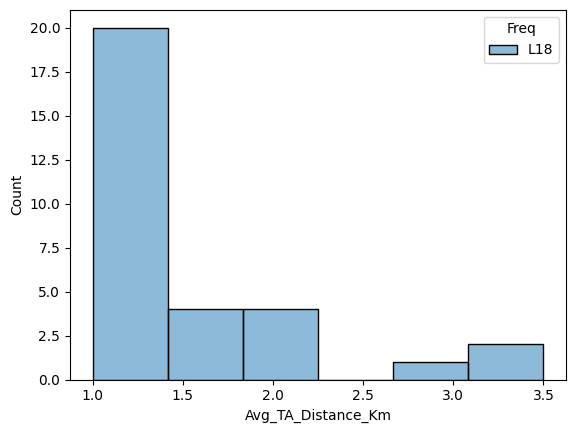

In [560]:
sns.histplot(data=df_unbalanced_9_18_final_VOD, x='Avg_TA_Distance_Km', hue='Freq')

[Text(0.5, 1.0, 'DL_Cell_Throughput'), Text(0.5, 0, 'Throughput')]

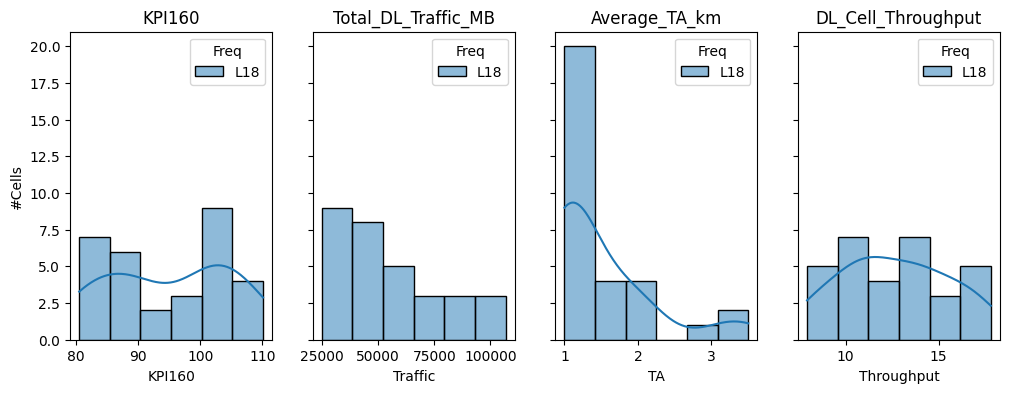

In [561]:
#Plot the comparison of the 1800 and 900 for the low utilization and high load 1800
#Insights show that 
#   - 900 is carrying low traffic compared to the 1800
#  - 1800 TA is going further with most 900 TA below 1km
#  - 2100 does not match 1800, need to investigate as propagation should be similar
#  - most 900 throughput samples are below 7.5Mbps while most of the 1800 is above 10Mbps

fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey='row')
g=sns.histplot(data=df_unbalanced_9_18_final_VOD, x='VF_KPI_160_Cell_Util__PRB', hue='Freq',kde=True, color='#e41a1c', ax=axs[0])
k=sns.histplot(data=df_unbalanced_9_18_final_VOD, x='Total_DL_Traffic_Mbytes', hue='Freq', color='#377eb8', ax=axs[1])
h=sns.histplot(data=df_unbalanced_9_18_final_VOD, x = 'Avg_TA_Distance_Km', hue='Freq', kde=True, ax=axs[2])
j=sns.histplot(data=df_unbalanced_9_18_final_VOD, x = 'Avg_DL_Cell_Throughput_Mbps_', hue='Freq', kde=True, ax=axs[3])


g.set(title='KPI160', xlabel='KPI160', ylabel='#Cells')
k.set(title='Total_DL_Traffic_MB', xlabel='Traffic')
h.set(title='Average_TA_km', xlabel='TA')
j.set(title='DL_Cell_Throughput', xlabel='Throughput')


In [415]:
df_unbalanced_9_18_final_VOD.query("Avg_DL_CA_User_Throughput <10")

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
2182,212281,2,22,LTE_Wadeville_Industrial_SGS_22,L9,10MHz,VOD,11.865385,241.346154,5.961538,...,8.393462,-1.230769,4.692308,43.884615,0.000000,8.653846,1.700000,4.961538,NaN,NaN
2184,212281,2,2,LTE_Wadeville_Industrial_SGS_2,L18,10MHz,VOD,108.484615,47348.846154,8.384615,...,8.554231,-1.807692,-0.884615,11724.307692,15.653846,5.653846,0.961538,3.115385,NaN,NaN
2080,213101,1,1,LTE_Scott_Gardens_SGS_1,L18,10MHz,VOD,107.946154,55136.423077,11.538462,...,10.699231,-1.576923,-0.538462,21065.692308,7.461538,8.923077,1.038462,4.230769,4.0,False
1771,216691,1,12,LTE_Leondale_SGS_12,L9,5MHz,VOD,24.146154,177.269231,4.000000,...,9.343462,-2.115385,-0.423077,56.961538,0.000000,8.230769,0.857143,2.538462,12.0,False
1687,217001,1,1,LTE_Dalpark_Tollgate_SGS_1,L18,10MHz,VOD,102.415385,38627.846154,8.769231,...,10.593462,3.423077,4.538462,22640.653846,4.461538,5.500000,1.192308,3.807692,NaN,NaN
1462,223101,1,1,LTE_Buhle_Park_SGS_1,L18,10MHz,VOD,104.247826,46690.565217,10.565217,...,11.150870,1.043478,1.521739,12954.173913,0.217391,8.869565,1.000000,4.043478,8.0,False
1132,229141,2,2,LTE_Brackenhurst_South_SGS_2,L18,10MHz,VOD,97.273077,37750.153846,10.576923,...,10.821154,1.576923,3.576923,16523.884615,1.076923,9.807692,1.346154,6.423077,NaN,NaN
1084,230401,1,12,LTE_Scaw_Metal_Dinwiddie_SGS_12,L9,10MHz,VOD,19.480769,999.076923,5.115385,...,6.095769,1.423077,4.153846,217.076923,1.192308,6.769231,1.115385,3.807692,NaN,NaN
748,247421,2,2,LTE_Forest_Timber_and_Board_SGS_2,L18,10MHz,VOD,92.003846,24870.653846,7.923077,...,8.701538,0.384615,-0.961538,2757.576923,0.038462,5.346154,1.000000,3.884615,14.0,False


In [416]:
df_unbalanced_9_18_final_VOD.head(73)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
2298,210961,1,12,LTE_Minnebron_SGS_12,L9,10MHz,VOD,16.123077,1797.846154,7.846154,...,9.526923,1.692308,4.846154,295.000000,0.423077,20.538462,1.038462,6.615385,10.0,False
2290,211041,1,1,LTE_Brakpan_SGS_1,L18,10MHz,VOD,91.350000,44239.846154,13.384615,...,10.790769,2.230769,4.153846,9937.461538,5.192308,15.884615,0.884615,8.153846,NaN,NaN
2220,212021,1,1,LTE_Phumula_SGS_1,L18,10MHz,VOD,103.307692,44506.923077,10.576923,...,9.340769,1.307692,2.769231,12371.115385,0.576923,11.461538,1.500000,4.615385,NaN,NaN
2182,212281,2,22,LTE_Wadeville_Industrial_SGS_22,L9,10MHz,VOD,11.865385,241.346154,5.961538,...,8.393462,-1.230769,4.692308,43.884615,0.000000,8.653846,1.700000,4.961538,NaN,NaN
2184,212281,2,2,LTE_Wadeville_Industrial_SGS_2,L18,10MHz,VOD,108.484615,47348.846154,8.384615,...,8.554231,-1.807692,-0.884615,11724.307692,15.653846,5.653846,0.961538,3.115385,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,249821,1,12,LTE_Havenga_Plot_SGS_12,L9,10MHz,VOD,15.137500,741.250000,4.375000,...,7.595000,1.750000,9.500000,235.875000,0.000000,11.625000,1.625000,2.875000,7.0,False
473,249941,1,12,LTE_Setchell_Ave_ATC_SGS_12,L9,10MHz,VOD,19.973077,3643.423077,9.192308,...,9.776154,-1.461538,10.961538,3072.000000,0.115385,27.153846,0.960000,3.307692,8.0,False
461,249961,1,12,LTE_Erasmus_Monareng_Schl_SGS_12,L9,5MHz,VOD,26.019231,1204.884615,4.923077,...,8.256923,-8.846154,0.615385,495.961538,0.000000,17.653846,0.047619,2.730769,10.0,False
289,256381,1,12,LTE_Wright_Park_SGS_12,L9,10MHz,VOD,27.819231,2766.307692,5.346154,...,7.570385,0.538462,0.730769,69.692308,0.000000,12.846154,1.000000,4.461538,8.0,False


In [592]:
#Which frequencies are available
df_unbalanced_9_18_final.Freq.unique()

array(['L18'], dtype=object)

In [419]:
df_unbalanced_9_18_final_VOD.shape

(73, 23)

# L18 vs L21

 - Analyse sectors which have different loads on the L18 and L21
 - This may assist in pointing out issues of RET configs

In [420]:
df_1800.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
2,27771,3,3,LTE_Dawn_Park_North_SGS_3,L18,10MHz,VOD,53.636000,19616.040000,13.640000,...,10.992400,2.440000,9.320000,15231.120000,0.160000,17.320000,1.680000,7.600000,NaN,NaN
5,27771,2,2,LTE_Dawn_Park_North_SGS_2,L18,10MHz,VOD,110.432000,63543.720000,13.600000,...,9.334800,0.080000,2.480000,40323.720000,21.840000,8.880000,2.240000,3.160000,NaN,NaN
12,27771,1,1,LTE_Dawn_Park_North_SGS_1,L18,10MHz,VOD,112.124000,75929.320000,17.040000,...,12.128400,2.120000,5.800000,50442.000000,10.240000,13.560000,2.560000,5.520000,9.0,False
16,27761,3,3,LTE_Rondebult_Exch_SGS_3,L18,10MHz,VOD,55.553846,30854.884615,17.076923,...,10.786538,3.692308,8.000000,4847.576923,1.115385,32.153846,1.423077,15.538462,NaN,NaN
19,27761,2,2,LTE_Rondebult_Exch_SGS_2,L18,10MHz,VOD,50.780769,17771.884615,14.153846,...,10.373846,4.000000,11.038462,6508.538462,2.538462,27.000000,1.280000,11.192308,NaN,NaN


In [421]:
df_2100.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
1,27771,3,31,LTE_Dawn_Park_North_SGS_31,L21,15MHz,VOD,97.564000,88805.240000,18.520000,...,11.266400,3.160000,5.040000,65679.520000,73.840000,12.840000,1.640000,6.800000,NaN,NaN
4,27771,2,21,LTE_Dawn_Park_North_SGS_21,L21,15MHz,VOD,103.412000,121241.640000,22.240000,...,9.954400,3.640000,5.320000,72605.080000,22.920000,14.320000,1.280000,7.920000,NaN,NaN
10,27771,1,11,LTE_Dawn_Park_North_SGS_11,L21,15MHz,VOD,86.692857,52193.000000,22.928571,...,11.287143,4.500000,8.785714,47575.080000,11.320000,18.571429,2.000000,11.714286,9.0,False
15,27761,3,31,LTE_Rondebult_Exch_SGS_31,L21,15MHz,VOD,36.823077,37341.538462,21.307692,...,11.514231,3.538462,6.769231,17324.038462,8.769231,35.461538,1.653846,24.000000,NaN,NaN
18,27761,2,21,LTE_Rondebult_Exch_SGS_21,L21,15MHz,VOD,44.450000,27152.884615,16.615385,...,11.986538,3.692308,8.653846,17730.000000,15.115385,28.076923,1.384615,11.461538,NaN,NaN


In [454]:
df_high_load_1800 = df_1800.query("VF_KPI_160_Cell_Util__PRB > 80")
df_low_load_2100 = df_2100.query("VF_KPI_160_Cell_Util__PRB <50")

In [455]:
df_high_load_1800.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
5,27771,2,2,LTE_Dawn_Park_North_SGS_2,L18,10MHz,VOD,110.432000,63543.720000,13.600000,...,9.334800,0.080000,2.4800,40323.720000,21.84,8.880000,2.24,3.1600,NaN,NaN
12,27771,1,1,LTE_Dawn_Park_North_SGS_1,L18,10MHz,VOD,112.124000,75929.320000,17.040000,...,12.128400,2.120000,5.8000,50442.000000,10.24,13.560000,2.56,5.5200,9.0,False
33,259961,2,20,LTE_Trees_Nursery_SGS_20,L18,10MHz,VOD,92.381250,22280.615385,11.125000,...,9.503125,0.375000,8.1250,0.000000,0.00,0.000000,0.00,6.8125,10.0,False
39,259961,1,10,LTE_Trees_Nursery_SGS_10,L18,10MHz,VOD,118.237500,41756.692308,12.687500,...,9.059375,0.312500,7.8125,0.000000,0.00,0.000000,0.00,3.7500,10.0,False
53,259101,3,30,LTE_Albertsdal_Palmietfontein_SGS_3,L18,10MHz,VOD,117.253846,64024.692308,14.192308,...,8.930769,1.076923,4.5000,22144.576923,51.00,12.538462,2.00,4.5000,6.0,False


In [456]:
df_low_load_2100.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
15,27761,3,31,LTE_Rondebult_Exch_SGS_31,L21,15MHz,VOD,36.823077,37341.538462,21.307692,...,11.514231,3.538462,6.769231,17324.038462,8.769231,35.461538,1.653846,24.000000,NaN,NaN
18,27761,2,21,LTE_Rondebult_Exch_SGS_21,L21,15MHz,VOD,44.450000,27152.884615,16.615385,...,11.986538,3.692308,8.653846,17730.000000,15.115385,28.076923,1.384615,11.461538,NaN,NaN
25,259961,3,31,LTE_Trees_Nursery_SGS_31,L21,15MHz,VOD,26.868750,10310.461538,19.312500,...,9.241250,1.875000,11.000000,0.000000,0.000000,0.000000,0.000000,25.062500,10.0,False
37,259961,1,11,LTE_1Trees_Nursery_SGS_11,L21,15MHz,VOD,48.706250,12855.038462,13.437500,...,9.280625,1.250000,9.500000,0.000000,0.000000,0.000000,0.000000,13.187500,10.0,False
42,259161,3,31,LTE_Enviroserve_Sundra_DAS_SGS_31,L21,10MHz,VOD,18.323077,2604.884615,11.153846,...,11.205385,1.384615,7.538462,0.000000,0.000000,0.000000,0.000000,15.115385,NaN,NaN


In [457]:
# need to join the 2 dataframes with high 18 and low 900 utilization
df_unbalanced_18_21 = pd.concat([df_high_load_1800 , df_low_load_2100]) 

In [458]:
df_unbalanced_18_21.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
5,27771,2,2,LTE_Dawn_Park_North_SGS_2,L18,10MHz,VOD,110.432000,63543.720000,13.600000,...,9.334800,0.080000,2.4800,40323.720000,21.84,8.880000,2.24,3.1600,NaN,NaN
12,27771,1,1,LTE_Dawn_Park_North_SGS_1,L18,10MHz,VOD,112.124000,75929.320000,17.040000,...,12.128400,2.120000,5.8000,50442.000000,10.24,13.560000,2.56,5.5200,9.0,False
33,259961,2,20,LTE_Trees_Nursery_SGS_20,L18,10MHz,VOD,92.381250,22280.615385,11.125000,...,9.503125,0.375000,8.1250,0.000000,0.00,0.000000,0.00,6.8125,10.0,False
39,259961,1,10,LTE_Trees_Nursery_SGS_10,L18,10MHz,VOD,118.237500,41756.692308,12.687500,...,9.059375,0.312500,7.8125,0.000000,0.00,0.000000,0.00,3.7500,10.0,False
53,259101,3,30,LTE_Albertsdal_Palmietfontein_SGS_3,L18,10MHz,VOD,117.253846,64024.692308,14.192308,...,8.930769,1.076923,4.5000,22144.576923,51.00,12.538462,2.00,4.5000,6.0,False


In [459]:
df_unbalanced_18_21.sort_values(['ENODEB_ID','Sector'])

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
2050,21321,1,11,LTE_Randhart_SGS_11,L21,15MHz,VOD,18.280769,12223.961538,16.576923,...,9.710000,2.076923,6.461538,10683.730769,3.076923,29.961538,1.230769,16.192308,NaN,NaN
2047,21321,2,21,LTE_Randhart_SGS_21,L21,15MHz,VOD,45.850000,22158.000000,13.923077,...,11.211154,1.538462,5.846154,18805.884615,2.692308,18.846154,1.076923,11.115385,NaN,NaN
18,27761,2,21,LTE_Rondebult_Exch_SGS_21,L21,15MHz,VOD,44.450000,27152.884615,16.615385,...,11.986538,3.692308,8.653846,17730.000000,15.115385,28.076923,1.384615,11.461538,NaN,NaN
15,27761,3,31,LTE_Rondebult_Exch_SGS_31,L21,15MHz,VOD,36.823077,37341.538462,21.307692,...,11.514231,3.538462,6.769231,17324.038462,8.769231,35.461538,1.653846,24.000000,NaN,NaN
12,27771,1,1,LTE_Dawn_Park_North_SGS_1,L18,10MHz,VOD,112.124000,75929.320000,17.040000,...,12.128400,2.120000,5.800000,50442.000000,10.240000,13.560000,2.560000,5.520000,9.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,259161,3,31,LTE_Enviroserve_Sundra_DAS_SGS_31,L21,10MHz,VOD,18.323077,2604.884615,11.153846,...,11.205385,1.384615,7.538462,0.000000,0.000000,0.000000,0.000000,15.115385,NaN,NaN
39,259961,1,10,LTE_Trees_Nursery_SGS_10,L18,10MHz,VOD,118.237500,41756.692308,12.687500,...,9.059375,0.312500,7.812500,0.000000,0.000000,0.000000,0.000000,3.750000,10.0,False
37,259961,1,11,LTE_1Trees_Nursery_SGS_11,L21,15MHz,VOD,48.706250,12855.038462,13.437500,...,9.280625,1.250000,9.500000,0.000000,0.000000,0.000000,0.000000,13.187500,10.0,False
33,259961,2,20,LTE_Trees_Nursery_SGS_20,L18,10MHz,VOD,92.381250,22280.615385,11.125000,...,9.503125,0.375000,8.125000,0.000000,0.000000,0.000000,0.000000,6.812500,10.0,False


In [460]:
df_unbalanced_18_21_final = df_unbalanced_18_21[df_unbalanced_18_21.duplicated(subset=['ENODEB_ID','Sector'],keep=False)]

In [461]:
df_unbalanced_18_21_final

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
39,259961,1,10,LTE_Trees_Nursery_SGS_10,L18,10MHz,VOD,118.237500,41756.692308,12.687500,...,9.059375,0.312500,7.812500,0.000000,0.000000,0.000000,0.000000,3.750000,10.0,False
57,259101,2,20,LTE_Albertsdal_Palmietfontein_SGS_2,L18,10MHz,VOD,96.111538,27535.923077,10.653846,...,9.444231,0.500000,8.153846,7607.269231,14.076923,14.653846,2.038462,6.500000,NaN,NaN
291,256381,1,10,LTE_Wright_Park_SGS_10,L18,10MHz,VOD,80.526923,26811.346154,10.115385,...,8.656154,1.230769,3.500000,7242.038462,11.538462,17.884615,1.615385,6.961538,6.0,False
326,255701,3,30,LTE_Leondale_Gardens_SGS_30,L18,10MHz,VOD,93.923077,42574.461538,11.615385,...,10.454231,1.384615,4.653846,16541.730769,86.038462,14.230769,1.500000,5.423077,6.0,False
352,255501,1,10,LTE_Ikusasalethu_Prim_SGS_10,L18,10MHz,VOD,100.607692,76315.615385,15.461538,...,11.081923,3.192308,6.038462,16466.230769,9.846154,12.076923,2.440000,8.230769,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,214841,1,11,LTE_Dawn_Park_SGS_11,L21,15MHz,VOD,32.669231,23423.038462,16.769231,...,12.278077,3.384615,9.769231,9177.538462,0.384615,25.192308,1.681818,23.269231,NaN,NaN
2033,213211,1,11,LTE_Jatniel_SGS_11,L21,15MHz,VOD,19.715385,21950.769231,25.576923,...,11.621538,4.038462,12.807692,20845.269231,0.423077,40.807692,2.280000,18.615385,8.0,False
2260,211611,1,11,LTE_Vosloorus_SGS_11,L21,10MHz,VOD,20.823077,7181.346154,12.769231,...,11.540385,6.538462,10.692308,678.153846,0.000000,29.115385,1.181818,15.230769,NaN,NaN
2273,211351,1,11,LTE_Wadeville_SGS_11,L21,15MHz,VOD,41.015385,29208.923077,16.846154,...,11.040000,3.307692,9.153846,21390.923077,3.576923,27.230769,2.615385,14.615385,NaN,NaN


In [462]:
#Filter only Vodacom cells and sort them
df_unbalanced_18_21_final_VOD = df_unbalanced_18_21_final.query("CellOwner == 'VOD'")

In [463]:
df_unbalanced_18_21_final_VOD.head()

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
39,259961,1,10,LTE_Trees_Nursery_SGS_10,L18,10MHz,VOD,118.237500,41756.692308,12.687500,...,9.059375,0.312500,7.812500,0.000000,0.000000,0.000000,0.000000,3.750000,10.0,False
57,259101,2,20,LTE_Albertsdal_Palmietfontein_SGS_2,L18,10MHz,VOD,96.111538,27535.923077,10.653846,...,9.444231,0.500000,8.153846,7607.269231,14.076923,14.653846,2.038462,6.500000,NaN,NaN
291,256381,1,10,LTE_Wright_Park_SGS_10,L18,10MHz,VOD,80.526923,26811.346154,10.115385,...,8.656154,1.230769,3.500000,7242.038462,11.538462,17.884615,1.615385,6.961538,6.0,False
326,255701,3,30,LTE_Leondale_Gardens_SGS_30,L18,10MHz,VOD,93.923077,42574.461538,11.615385,...,10.454231,1.384615,4.653846,16541.730769,86.038462,14.230769,1.500000,5.423077,6.0,False
352,255501,1,10,LTE_Ikusasalethu_Prim_SGS_10,L18,10MHz,VOD,100.607692,76315.615385,15.461538,...,11.081923,3.192308,6.038462,16466.230769,9.846154,12.076923,2.440000,8.230769,6.0,False


In [464]:
df_unbalanced_18_21_final_VOD.sort_values(['ENODEB_ID', 'Sector'], inplace=True)

C:\Users\kaudim\AppData\Local\Temp\ipykernel_17472\3615096104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbalanced_18_21_final_VOD.sort_values(['ENODEB_ID', 'Sector'], inplace=True)


In [465]:

df_unbalanced_18_21_final_VOD.duplicated(subset=['ENODEB_ID', 'CI']).sum()

13

In [466]:
df_unbalanced_18_21_final_VOD.drop_duplicates(subset=['ENODEB_ID', 'CI'], inplace=True)

C:\Users\kaudim\AppData\Local\Temp\ipykernel_17472\2320858719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unbalanced_18_21_final_VOD.drop_duplicates(subset=['ENODEB_ID', 'CI'], inplace=True)


In [467]:
df_unbalanced_18_21_final_VOD.shape

(84, 23)

In [471]:
df_unbalanced_18_21_final_VOD.head(50)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
2340,210571,1,11,LTE_Springs_SGS_11,L21,15MHz,VOD,33.369231,42749.076923,20.384615,...,12.573077,5.115385,13.153846,24456.538462,0.615385,39.538462,2.038462,24.923077,12.0,False
2290,211041,1,1,LTE_Brakpan_SGS_1,L18,10MHz,VOD,91.350000,44239.846154,13.384615,...,10.790769,2.230769,4.153846,9937.461538,5.192308,15.884615,0.884615,8.153846,NaN,NaN
2273,211351,1,11,LTE_Wadeville_SGS_11,L21,15MHz,VOD,41.015385,29208.923077,16.846154,...,11.040000,3.307692,9.153846,21390.923077,3.576923,27.230769,2.615385,14.615385,NaN,NaN
2260,211611,1,11,LTE_Vosloorus_SGS_11,L21,10MHz,VOD,20.823077,7181.346154,12.769231,...,11.540385,6.538462,10.692308,678.153846,0.000000,29.115385,1.181818,15.230769,NaN,NaN
2220,212021,1,1,LTE_Phumula_SGS_1,L18,10MHz,VOD,103.307692,44506.923077,10.576923,...,9.340769,1.307692,2.769231,12371.115385,0.576923,11.461538,1.500000,4.615385,NaN,NaN
2080,213101,1,1,LTE_Scott_Gardens_SGS_1,L18,10MHz,VOD,107.946154,55136.423077,11.538462,...,10.699231,-1.576923,-0.538462,21065.692308,7.461538,8.923077,1.038462,4.230769,4.0,False
2066,213201,1,1,LTE_Dersley_SGS_1,L18,10MHz,VOD,104.723077,51730.576923,12.769231,...,10.923462,2.346154,7.269231,22317.730769,0.000000,13.884615,1.500000,5.500000,5.0,False
2033,213211,1,11,LTE_Jatniel_SGS_11,L21,15MHz,VOD,19.715385,21950.769231,25.576923,...,11.621538,4.038462,12.807692,20845.269231,0.423077,40.807692,2.280000,18.615385,8.0,False
2025,213211,3,3,LTE_Jatniel_SGS_3,L18,10MHz,VOD,98.826923,53866.923077,14.000000,...,11.312308,2.461538,1.769231,25415.153846,6.346154,13.230769,1.153846,7.846154,4.0,False
1960,214841,1,11,LTE_Dawn_Park_SGS_11,L21,15MHz,VOD,32.669231,23423.038462,16.769231,...,12.278077,3.384615,9.769231,9177.538462,0.384615,25.192308,1.681818,23.269231,NaN,NaN


In [472]:
df_unbalanced_18_21_final_VOD.tail(40)

,ENODEB_ID,Sector,CI,CellName,Freq,BW,CellOwner,VF_KPI_160_Cell_Util__PRB,Total_DL_Traffic_Mbytes,Avg_DL_Cell_Throughput_Mbps_,...,Avg_CQI,Avg_SINR_PUCCH_dB,Avg_SINR_PUSCH_dB,CA_DL_Traffic_MB,CA_UL_Traffic_MB,Avg_DL_CA_User_Throughput,Avg_UL_CA_User_Throughput,Avg_DL_Non-CA_User_Throughpu,Tilt,RAIN
1109,229801,2,21,LTE_Laerskool_Morester_SGS_21,L21,10MHz,VOD,46.396154,9215.692308,11.307692,...,9.436538,1.884615,2.192308,2953.884615,0.076923,20.115385,0.611111,9.000000,8.0,False
1085,230401,1,11,LTE_Scaw_Metal_Dinwiddie_SGS_11,L21,15MHz,VOD,12.103846,4323.461538,13.307692,...,9.038077,4.038462,9.653846,2188.153846,0.923077,21.846154,1.041667,18.500000,NaN,NaN
1037,236241,1,1,LTE_Union_SGS_1,L18,10MHz,VOD,84.541667,55321.000000,17.125000,...,12.402917,2.833333,10.375000,29606.875000,0.250000,21.041667,1.500000,9.958333,3.0,False
964,239241,2,2,LTE_Mast_Projects_Brakp_SGS_2,L18,10MHz,VOD,92.519231,57305.500000,13.000000,...,10.826154,2.307692,5.038462,15893.153846,11.538462,15.346154,1.000000,7.500000,7.0,False
962,239241,2,21,LTE_Mast_Projects_Brakp_SGS_21,L21,15MHz,VOD,49.823077,45326.961538,19.576923,...,12.885769,2.615385,12.192308,18895.769231,15.538462,27.538462,1.769231,21.653846,7.0,False
934,239441,1,11,LTE_Meyersdal_View_Estate_LP_SGS_11,L21,15MHz,VOD,19.430769,13868.230769,15.769231,...,8.173846,5.576923,10.615385,12300.653846,0.730769,28.538462,1.038462,16.423077,2.0,False
905,239481,1,11,LTE_Alberton_VW_LP_SGS_11,L21,15MHz,VOD,27.753846,8935.384615,10.807692,...,9.581538,-2.692308,2.846154,6838.615385,2.846154,18.230769,0.500000,7.961538,4.0,False
889,242621,1,11,LTE_Letaba_Str_SGS_11,L21,15MHz,VOD,34.915385,25938.076923,20.038462,...,11.103462,2.076923,10.923077,17588.423077,8.384615,29.346154,1.423077,18.961538,NaN,NaN
789,245701,1,11,LTE_Grey_Villea_Str_LP_SGS_11,L21,15MHz,VOD,20.076923,11817.076923,15.153846,...,10.477692,2.961538,7.192308,9276.346154,0.653846,31.384615,0.846154,17.230769,7.0,False
751,247421,1,11,LTE_Forest_Timber_and_Board_SGS_11,L21,15MHz,VOD,26.776923,19140.000000,14.576923,...,10.026923,3.538462,8.269231,12230.230769,1.807692,32.000000,1.192308,18.307692,NaN,NaN


[Text(0.5, 1.0, 'DL_Cell_Throughput'), Text(0.5, 0, 'Throughput')]

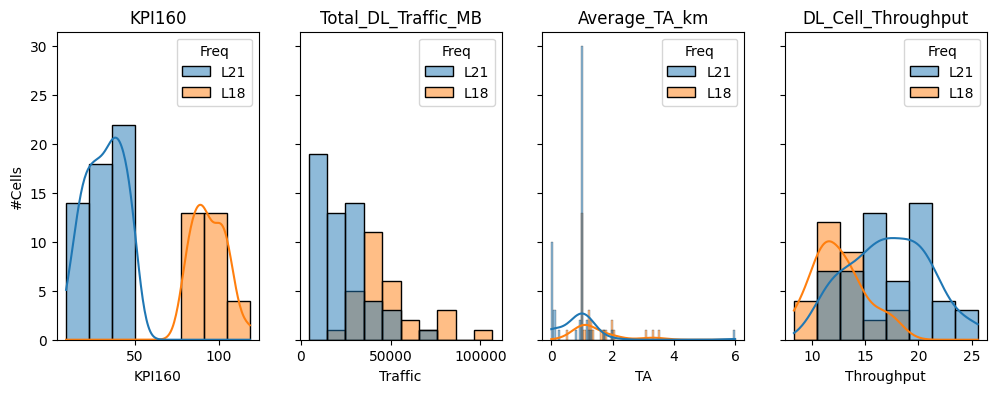

In [469]:
#Plot the comparison of the 1800 and 900 for the low utilization and high load 1800
#Insights show that 
#   - L21 carrying more traffic than L1800
#  - Ta is somewhat similar between the two L21 and L18
#  - L1800 is carrying more traffic than L2100
#  - most 900 throughput samples are below 7.5Mbps while most of the 1800 is above 10Mbps

fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey='row')
g=sns.histplot(data=df_unbalanced_18_21_final_VOD, x='VF_KPI_160_Cell_Util__PRB', hue='Freq',kde=True, color='#e41a1c', ax=axs[0])
k=sns.histplot(data=df_unbalanced_18_21_final_VOD, x='Total_DL_Traffic_Mbytes', hue='Freq', color='#377eb8', ax=axs[1])
h=sns.histplot(data=df_unbalanced_18_21_final_VOD, x = 'Avg_TA_Distance_Km', hue='Freq', kde=True, ax=axs[2])
j=sns.histplot(data=df_unbalanced_18_21_final_VOD, x = 'Avg_DL_Cell_Throughput_Mbps_', hue='Freq', kde=True, ax=axs[3])


g.set(title='KPI160', xlabel='KPI160', ylabel='#Cells')
k.set(title='Total_DL_Traffic_MB', xlabel='Traffic')
h.set(title='Average_TA_km', xlabel='TA')
j.set(title='DL_Cell_Throughput', xlabel='Throughput')
